# Tuesday: Clustering and SOM

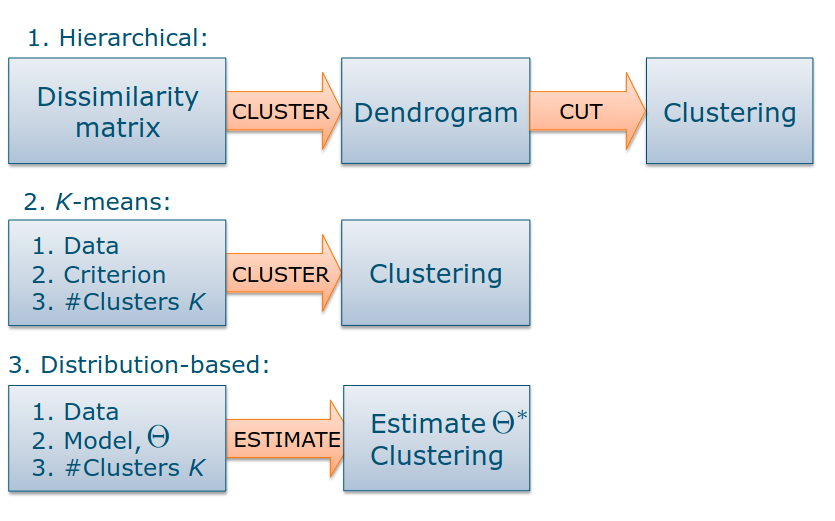

**Gaussian mixture models**

The problem with hierarchical and K-means clustering is that they are so called hard-clustering methods, your either inside the cluster or outside. Gaussian mixture models aim to fit a gaussian to the data to accuralely describe the fuzzy boundry parts, where two cluster border. This also called soft-clustering.

To fit a gaussian we need to know:

* the number of dimensions in the data
* the location of the gaussian e.g. mean
* the width i.e. (co)variance of the gaussian

To estimate the parameters we use maximum-likelihood, as we want the gaussian to be where the chance of observing the data is highest. We can fit different probability density fucntions to the data gaussian, uniform, polynomial. 

The overall probability is the sum of all density distributions i.e. their area under the curve and this number is equal to one (bayesian). The parameters are called $\theta$. 

$$\Large p(x|\Theta)=\sum_{k=1}^{K}p(k)p(x|\theta_{k})=\sum_{k=1}^{K}\pi_{k}p(x|\theta_{k})$$

The parameters for $\theta$ are the mean and the covariance matrix, we use these to build a mixture model by optimizing them using maximum likelihood.



**Latent variable**

A latent variable $Z$ is a variable that cannot be measured directly but influences how we observe some observable variable $X$ e.g. iq is observable but intelligence is not. 

*Whats the importance of latent variables in clustering*

let's say your clustering "height" and "weight" data form animals, the latent variable "animal type" is not included in your dataset but will influence how you measure $X$. So if we assume that there is this latent variabe $Z$, for the sake of example we only got data from cats and dogs it is only logical that we fit a mixture of two gaussian to our data. 

Using a mixture of gaussian we can calculate the posterior probability a.k.a. cluster responsability $\large \gamma_{ki}$ which denotes how much responsability a cluster takes for datapoint i.e. how probable it is that the datapoint belongs to that cluster (soft clustering).

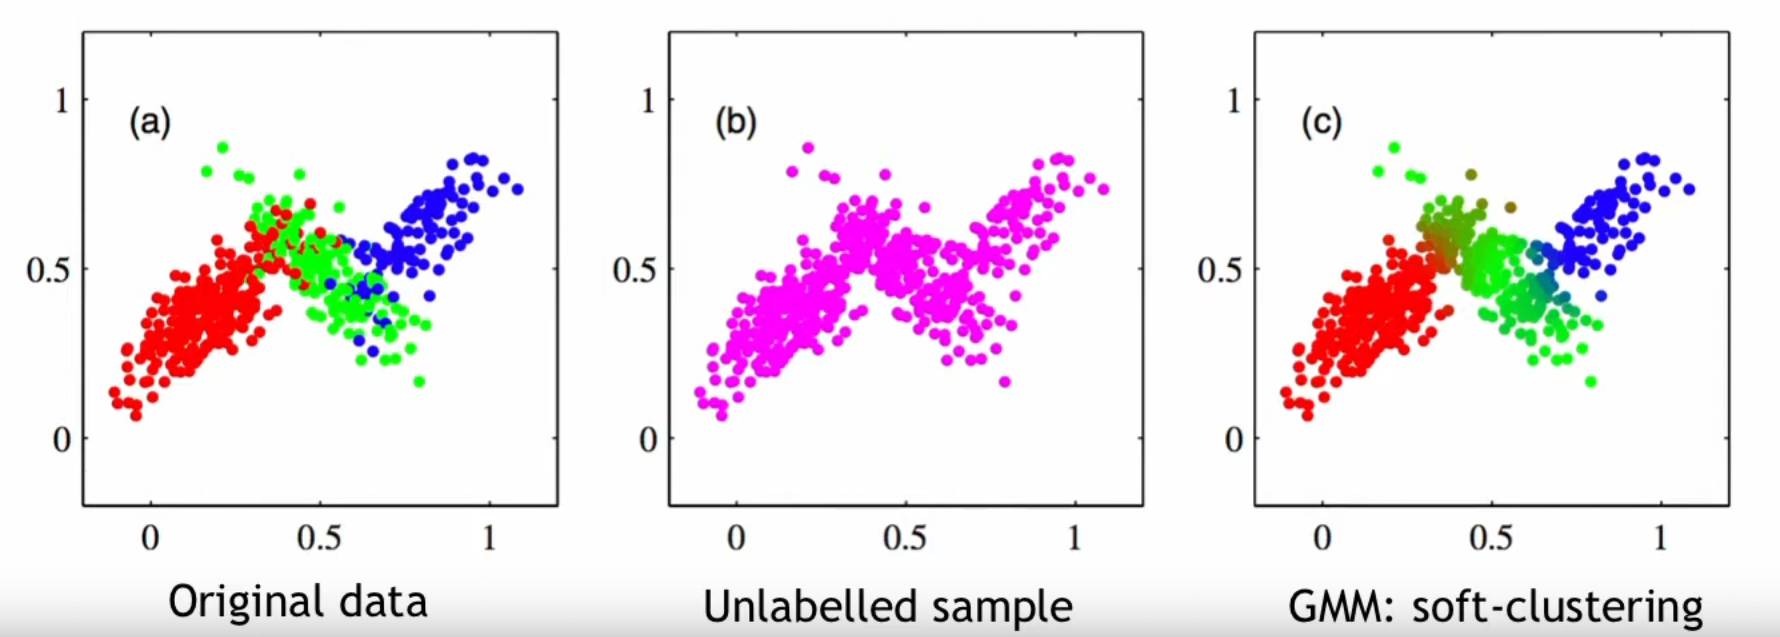

**Expectation-Maximization problem (EM)**

repeatedly:
1. recalculate the clustermembership of each sample, this is done using a probability $\pi_k$ and a probability density function which are denoted below using bayes theorem. (Expected posterior) this known as  $\gamma_{ki}$ i.e. cluster responsability.
   $$\Large p(z_{k i}=1|x_{i})=\frac{p(z_{k i}=1)p(x_{i}|z_{k i}=1)}{\sum_{k^{\prime}=1}p(z_{k^{\prime}i}=1)p(x_{i}|z_{k^{\prime}i}=1)}=\frac{\pi_{k}N(x_{i}|\mu k,\Sigma_{k})}{\sum_{k^{\prime}=1}\pi_{k^{\prime}}N(x_{i}|\mu k^{\prime},\Sigma_{k^{\prime}})}$$
3. recalculate the the density parameters of each cluster. ()

Example:
1. start with random parameters (fig 1,1)
2. update the expected posterior $\large \gamma_{ki}$ (fig 1,2)
3. Maximize the log likelihood i.e. optimize the parameters so that its most likely describing the points, which were assigned in step 2. (fig 1,3)
4. update the expected posterior again. (fig 2,1)
5. maximize the parameters again. (fig 2,2)
6. until the configuration doesn't change anymore.

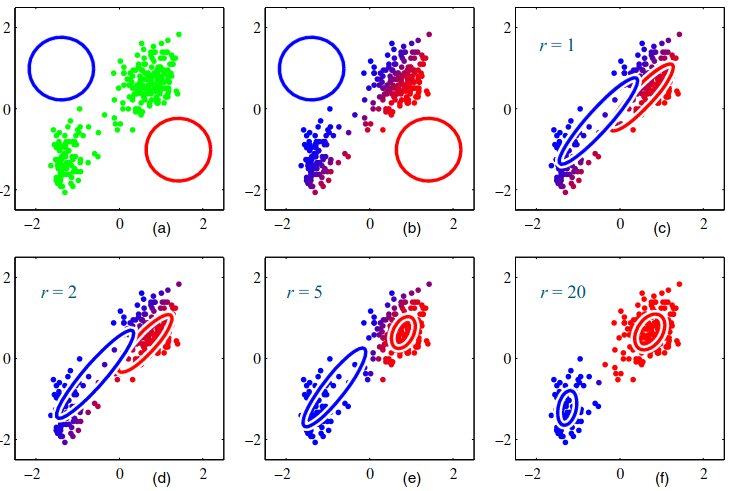

*k-means are a special case of of mixture-gaussians*

This is the case as when all the clusters are spherical and the variances are infinitely small, then the EM algorithm for mixtures simplifies to the K-means algorithm. As the cluster assignment becomes absolute no confussion, every datapoint is assigned to the right cluster.

Clustering is subjective and doesn't prove anything, it is validated using bootstrapping. 

**Self Organizing Map (SOM)**

A model that self organizes based on learning rules and interactions. It uses a map/lattice/rooster of neurons, the data input is connected by weights. The neurons in the lattice have neighbours and the neurons learn together in these neighourhoods. 

The goal:

* find weight values such that adjecent neurons have similar values.
* inputs are assigned to neurons that are similar i.e. the neuron weight represents the input weight it learns the structure of the data.
* The big neurons represent thus a large portion of the data imagine a gaussian growing on top of the map with its mean above such a big neuron (red in the image). 

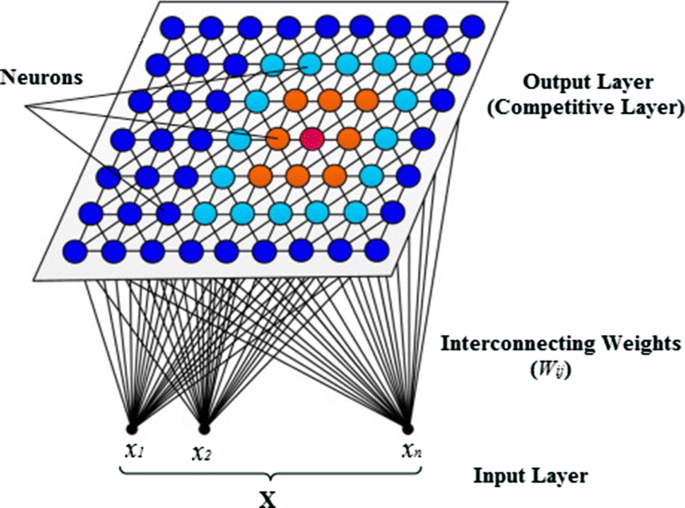


Formulation: 
1. given input $X$ find i'th neuron with closest weight vector by competition. At the beginning the weights are random.
2. The similarity of the neuron with the input vector is calculated using the dot product. 90 degree angle gives dot product of zero, the higher the dot product the more similar the vectors.
3. for each neuron j in the neighbourhood of N(i) adjust the weights of j. Neurons outside the neighbourhood nothing is updated. 

so: **Competition &rarr; Collaboration &rarr; weight update**

The gaussian function is used to model the neighbourhood, hence parameters are $\sigma$, the function can also shrink in witdth over the iterations.  

In [2]:
l = lambda the, y, n: the**n * (1-the)**(y-n)

7.50480199247832e-23

In [33]:
import numpy as np 
import matplotlib.pyplot as plt

thes = np.linspace(0,1, 100)

y = l(thes, 100, 20)
logy = np.log(l(thes, 100, 20))

/tmp/ipykernel_5671/1834596569.py:7: RuntimeWarning: divide by zero encountered in log
  logy = np.log(l(thes, 100, 20))


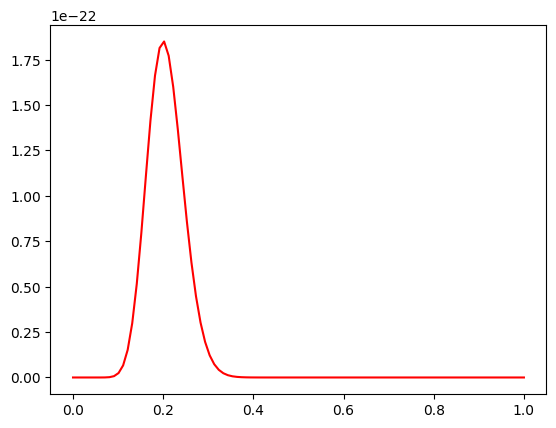

In [34]:
plt.plot(thes, y, "r")

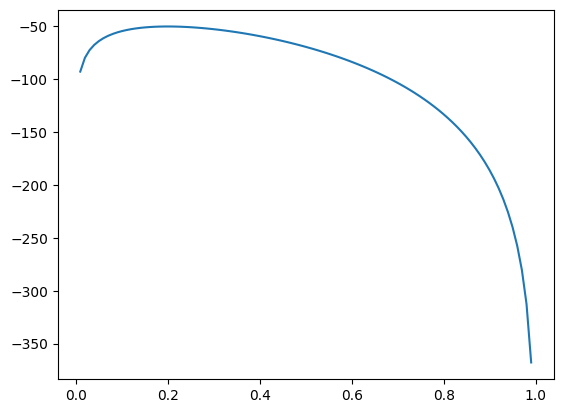

In [36]:
plt.plot(thes, logy)